In [83]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
%matplotlib inline

# Qusetion
$$ \frac{\partial u}{\partial t}-\frac{\partial^{2} u}{\partial x^{2}} = 0$$

$$0< x<2,0<t \\ u(0,t)=u(2,t)=0,0<t  \\ u(x,0) = sin(\frac{\pi}{2}x)$$

## exact soluation

$$u(x,t) = e^{-\frac{\pi^{2}}{4}t}\sin{\frac{\pi}{2}x}$$


In [317]:
def exact_solution(x, t):
    return np.exp(-((np.pi**2) * t)/4) * np.sin((np.pi * x)/2)


In [306]:
def bound_condition(Lx, Lt):
    u = np.zeros([len(Lx)])
    for i in range(len(Lx)):
        if Lx[i] == 0 or Lx[i] == 2:
            u[i]==0
        elif Lt[i] == 0:
            u[i] = np.sin(np.pi*Lx[i]/2)
    return u 

In [312]:
h = 10
h_sep = 2/h
k = 9
k_sep = 100/k
x = np.linspace(0, 2, num=h)
tim = np.linspace(0,100,num = k)
x,t = np.meshgrid(x,tim)

Text(0.5, 0, 'u')

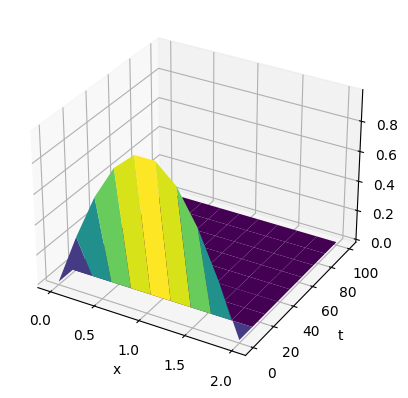

In [320]:
u = exact_solution(x,t)
ax = plt.axes(projection='3d')
ax.plot_surface(x,t,u, cmap='viridis') 
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

# SOR

In [88]:
def SOR(A_matrix,B_matrix,w = 1):
    N= 100000
    TOL = 1e-6
    k = 1
    n = A_matrix.shape[0]
    init_x = np.zeros_like(B_matrix,dtype="float64")
    x = copy.deepcopy(init_x)
    while(k<N):
        x_p = copy.deepcopy(x)
        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j==i:
                    continue
                summ += A_matrix[i][j] * x[j]
                
            x[i] = w*(-summ + B_matrix[i])/A_matrix[i][i]

            x[i] +=(1-w)*x_p[i]
        esp = escape(x_p,x,TOL)[0]
        if esp:
            break
        k+=1

    return x
def escape(old_x,new_x,TOL):
    if np.max(np.abs(old_x - new_x)) < TOL:
        return True,np.max(np.abs(old_x - new_x))
    return False,np.max(np.abs(old_x - new_x))


# Crank_Nicolson

In [89]:
def crank_Ametrix(x_len):
    x_len = x_len-2
    lamb = k_sep/(2*h_sep**(2))
    matrix = np.zeros([x_len,x_len])
    for i in range(x_len):
        matrix[i][i] = lamb +1
        if i ==(x_len-1):
            continue
        matrix[i][i+1] = -lamb/2
        matrix[i+1][i] = -lamb/2
    return matrix

def crank_Bmetrix(x_len):
    x_len = x_len-2
    lamb = k_sep/(2*h_sep**(2))
    matrix = np.zeros([x_len,x_len])
    for i in range(x_len):
        matrix[i][i] = 1 - lamb 
        if i ==(x_len-1):
            continue
        matrix[i][i+1] = lamb/2
        matrix[i+1][i] = lamb/2
    return matrix   

In [281]:
u2 = []
for i in range(k): # by t
    if i == 0:
        u2.append(bound_condition(x[0],t[0]))
    else:
        u2.append(copy.deepcopy(u2[i-1]))
        
        B = u2[i][1:-1]
        B = B @ crank_Bmetrix(h)
        u2[i][1:-1] = SOR(crank_Ametrix(h),B)


In [283]:
u2 = np.array(np.abs(u2))

Text(0.5, 0, 'u')

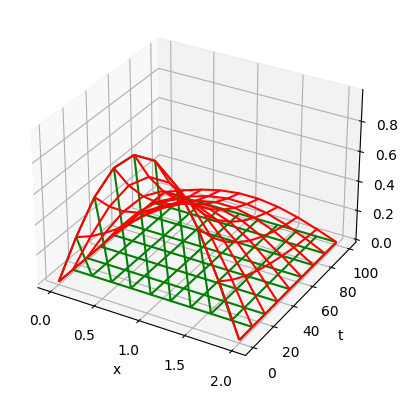

In [285]:
u = exact_soluation(x,t)
ax = plt.axes(projection='3d')
ax.plot_wireframe(x,t,u,color='g') 
ax.plot_wireframe(x,t,u2,color='r') 

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')